In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import cmasher as cm

In [2]:
data = pd.read_csv('../files/gcns_with_mass.csv')
data

,Unnamed: 0,source_id,RA,RA_ERROR,DEC,DEC_ERROR,PARALLAX,PARALLAX_ERROR,PMRA,PMRA_ERROR,...,distance_gspphot_lower,distance_gspphot_upper,teff_gspphot,teff_gspphot_lower,teff_gspphot_upper,logg_gspphot,logg_gspphot_lower,logg_gspphot_upper,ipd_frac_multi_peak,mass_flame
0,0,383095247260963712,2.058686,0.022047,39.728708,0.016036,11.190593,0.030270,-76.268702,0.024213,...,90.3455,90.9165,3395.2993,3391.0560,3405.7048,4.7682,4.7507,4.8042,0,NaN
1,1,383108338321272448,1.977553,0.038781,39.791932,0.029635,29.100410,0.057270,359.096889,0.043967,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2,2,383162661067592192,1.680234,0.128044,40.009855,0.092270,14.690472,0.168487,272.229495,0.143219,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN
3,3,383167952465316864,1.905896,0.021587,40.147840,0.019093,11.172839,0.032044,-32.150140,0.027103,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN
4,4,383167952467292288,1.907764,0.225813,40.147854,0.170263,9.794068,0.344391,-27.196407,0.273073,...,75.6136,78.7228,4907.0550,4902.6360,4909.7793,2.9687,2.9463,2.9820,0,2.251833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331306,331306,6533471819377716736,358.771159,0.009305,-41.401665,0.011389,10.575865,0.015878,-3.030721,0.012908,...,94.1908,94.5297,5611.3000,5609.3320,5617.1650,4.2016,4.2006,4.2026,0,NaN
331307,331307,6533483501688768128,358.651669,0.019821,-41.321624,0.023251,14.704621,0.030420,106.865119,0.027199,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
331308,331308,6533503464696796928,359.239473,0.008948,-41.013088,0.011554,12.517269,0.013941,87.464742,0.011966,...,80.4142,80.5935,4125.3190,4124.0645,4126.6190,4.7023,4.7008,4.7038,0,NaN
331309,331309,6533503464696797056,359.237353,0.033996,-41.012712,0.045042,12.723253,0.052598,86.783013,0.044988,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


## HR Diagram

In [4]:
# get absolute magnitude
# M = m + 5log(p) + 5
# p in arcseconds, gaia qives in mas
abs_mag = data['phot_g_mean_mag'] + 5*np.log10(data['PARALLAX']/1000) + 5 

# get color
color = data['phot_bp_mean_mag'] - data['phot_g_mean_mag']

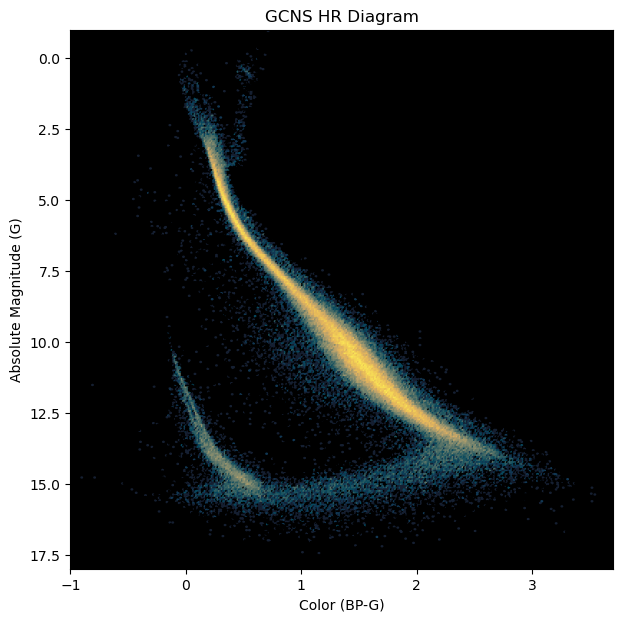

In [5]:
fig,ax = plt.subplots(figsize = (7,7))

ax.set_title('GCNS HR Diagram')
ax.set_ylabel('Absolute Magnitude (G)')
ax.set_xlabel('Color (BP-G)')

ax.set_ylim([18,-1])
ax.set_xlim([-1,3.7])

# ax.scatter(color,abs_mag, s=.08, alpha=1, color='darkmagenta')
cmap = cm.cm.eclipse
hb = ax.hexbin(color, abs_mag, gridsize=700, bins='log', cmap=cmap)

# Set the facecolor of the hexbin plot to match the lowest density color
ax.set_facecolor(cmap(0))

## Radial Velocity Limiting Mag

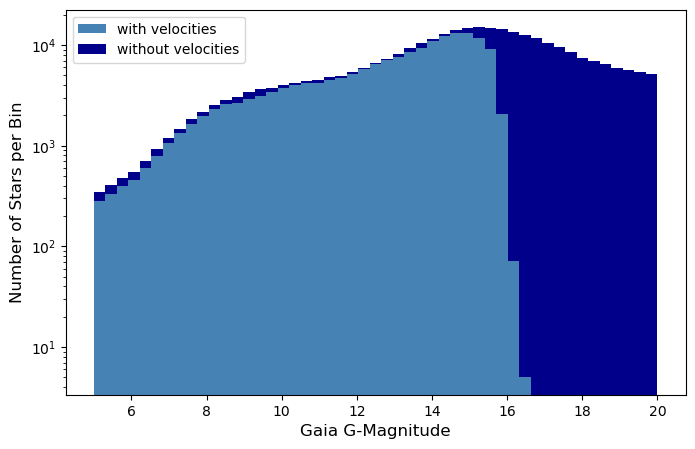

In [6]:
# radial velocities seem to be magnitude-limited
has_radvel = np.array(data['RADIAL_VELOCITY'].notnull())
no_radvel = np.logical_not(has_radvel)


fig,ax = plt.subplots(figsize=(8,5))
ax.hist([data[has_radvel]['phot_g_mean_mag'], data[no_radvel]['phot_g_mean_mag']], stacked="True",\
    bins = np.linspace(5, 20),\
    label = ["with velocities", "without velocities"],\
    color = ["steelblue", "darkblue"])
#ax.hist(df_without_vel["Gmag"], stacked = True)
ax.set_yscale("log")

ax.legend()

ax.set_xlabel("Gaia G-Magnitude", fontsize = 12)
ax.set_ylabel("Number of Stars per Bin", fontsize = 12)

plt.show()

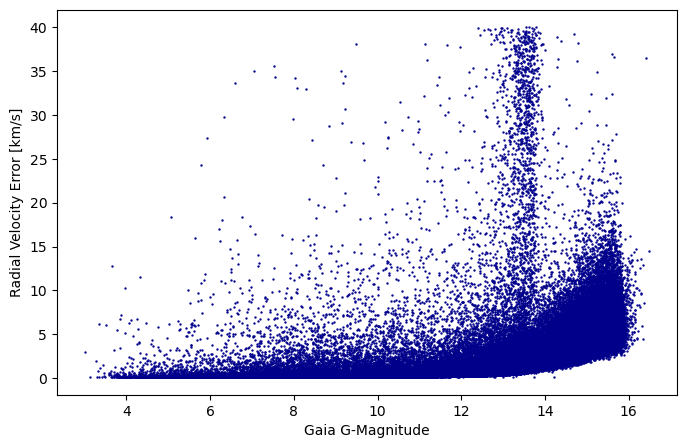

In [17]:
fig,ax = plt.subplots(figsize=(8,5))
ax.set_ylabel("Radial Velocity Error [km/s]")
ax.set_xlabel("Gaia G-Magnitude")
ax.scatter(data['phot_g_mean_mag'],data['RADIAL_VELOCITY_ERROR'],s=.5, color='darkblue')

## Other Limiting Magnitudes? (no)

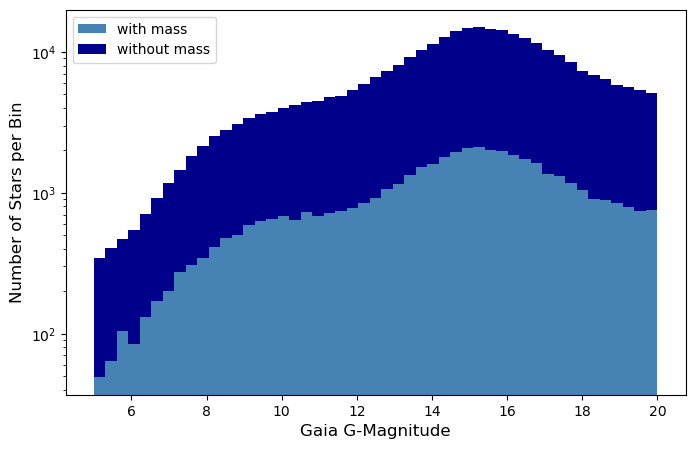

In [7]:
# radial velocities seem to be magnitude-limited
has_radvel = np.array(data['mass_flame'].notnull())
no_radvel = np.logical_not(has_radvel)


fig,ax = plt.subplots(figsize=(8,5))
ax.hist([data[has_radvel]['phot_g_mean_mag'], data[no_radvel]['phot_g_mean_mag']], stacked="True",\
    bins = np.linspace(5, 20),\
    label = ["with mass", "without mass"],\
    color = ["steelblue", "darkblue"])
#ax.hist(df_without_vel["Gmag"], stacked = True)
ax.set_yscale("log")

ax.legend()

ax.set_xlabel("Gaia G-Magnitude", fontsize = 12)
ax.set_ylabel("Number of Stars per Bin", fontsize = 12)

plt.show()

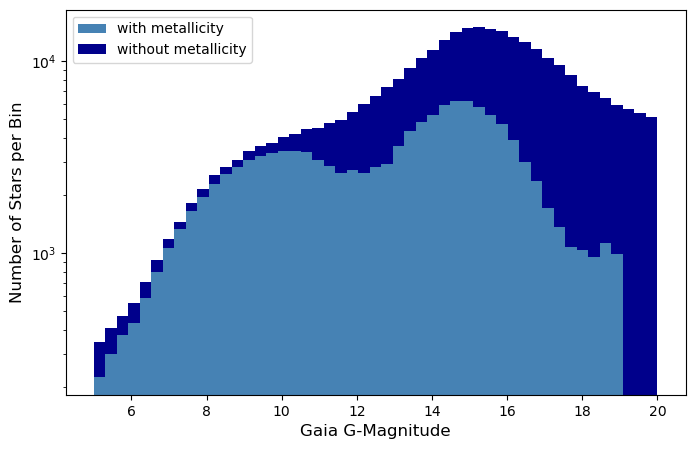

In [9]:
# radial velocities seem to be magnitude-limited
has_radvel = np.array(data['mh_gspphot'].notnull())
no_radvel = np.logical_not(has_radvel)


fig,ax = plt.subplots(figsize=(8,5))
ax.hist([data[has_radvel]['phot_g_mean_mag'], data[no_radvel]['phot_g_mean_mag']], stacked="True",\
    bins = np.linspace(5, 20),\
    label = ["with metallicity", "without metallicity"],\
    color = ["steelblue", "darkblue"])
#ax.hist(df_without_vel["Gmag"], stacked = True)
ax.set_yscale("log")

ax.legend()

ax.set_xlabel("Gaia G-Magnitude", fontsize = 12)
ax.set_ylabel("Number of Stars per Bin", fontsize = 12)

plt.show()

## Find Closest Star w/o Radial Velocity

In [18]:
# M = m - 5log10(d) + 5
# with M = absolute mag of M9 star = 10ish
# d = 10^[(m-5)/5]
# with m = limiting mag

def limiting_dist(limiting_mag):
    return 10**((limiting_mag-5)/5)

for limiting_mag in [13,16]:
    print(f"An M9 star has m = {limiting_mag} at d = {limiting_dist(limiting_mag)} pc")

An M9 star has m = 13 at d = 39.810717055349734 pc
An M9 star has m = 16 at d = 158.48931924611142 pc
